# 1. Google Drive에서 Google Colab사용 환경

In [ ]:
# 다음 코드를 실행하면 자신의 Google Drive에 만들어진 MyProject에 연결됨
import os
import sys
from pathlib import Path
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive', force_remount=True)
project_root = Path('/content/drive/MyDrive/MyProject')

# 워킹 디렉터리 이동
os.chdir(project_root)

# Functions 폴더를 import 경로에 추가
sys.path.append(str(project_root / 'Functions'))

print("Working Directory:", Path.cwd())
print("Functions Path Added:", project_root / 'Functions')

Mounted at /content/drive
Working Directory: /content/drive/MyDrive/MyProject
Functions Path Added: /content/drive/MyDrive/MyProject/Functions


# 2. Google Colab에 설치되지 않은 라이브러리 확인 및 설치

In [ ]:
# 필자가 머신러닝의 계량경제학 I에서 주로 사용하고 있는 라이브러리를 실행하여 설치되지 않은 라이브러리 설치
!python Functions/Traditional_Econometrics_Lib.py

In [ ]:
# 위의 코드를 실행하면서 설치되지 않은 라이브러리를 확인하고 설치하는 과정 반복
# 아래는 현재 시점 구글코랩에 설치되지 않은 라이브러리 설치
!pip install arch  linearmodels stargazer wooldridge

# 3. Google Colab에서 실행여부 확인

In [ ]:
# Google Drive에 있는 MyProject/Data/wage.csv 임포트
import pandas as pd
df = pd.read_csv('Data/wage1.csv')
print(df.head())

   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc  lwage  expersq  tenursq  
0        0  1.131        4        0  
1        1  1.176      484        

In [ ]:
# 단순회귀모형 추정
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import wooldridge as woo

In [ ]:
vote1 = woo.dataWoo('vote1')

In [ ]:
# Wooldridge Data 불러오기
# 수식을 이용한 회귀모형 추정
x = vote1['shareA']
y = vote1['voteA']

# x,y의 상관계수
cov_xy = np.cov(x, y)[1, 0]
# x분산
var_x = np.var(x, ddof=1)
# x, y의 평균
x_bar = np.mean(x)
y_bar = np.mean(y)

# 회귀모형 추정(1): ''사용
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar
print('\n')
print('모형의 추정결과')
print('파라미터 추정치(기울기):', b1)
print('파라미터 추정치(절편)  :', b0)
print('\n')



모형의 추정결과
파라미터 추정치(기울기): 0.46382691229088535
파라미터 추정치(절편)  : 26.81221412868039




In [ ]:
# statsmodels.formula library를 이용한 회귀모형 추정법
reg = smf.ols(formula='y ~ x', data=vote1)
results =reg.fit()

# 정해진 양식 전부 출력
#print(results.summary())
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           6.63e-74
Time:                        04:10:38   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.000      25.061      28.564
x              0.4638      0.015     31.901      0.000       0.435       0.493
==============================================================================
Omnibus:                       20.747   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.613
Skew:                           0.525   Prob(JB):                     2.05e-10
Kurtosis:                       5.255   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'shareA')

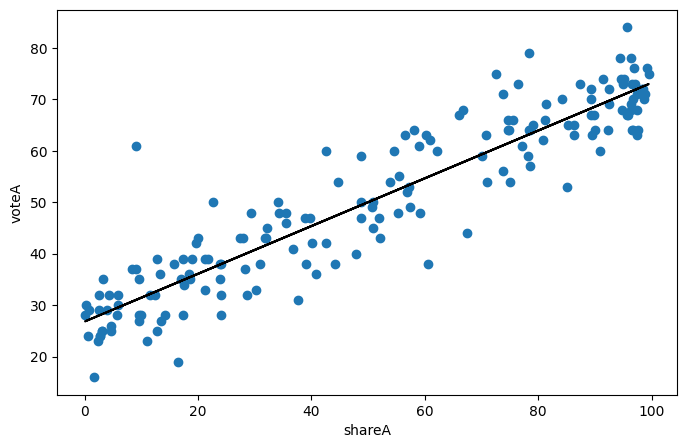

In [ ]:
# 실제 데이터 값과 회귀추정식에 의한 Fitted된 값 그래프로 그리기
plt.figure(figsize =(8, 5))
plt.scatter('shareA', 'voteA', data=vote1)
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('voteA')
plt.xlabel('shareA')


# 4. 필자의 함수 이용법(MyProject/Functions내의 함수 이용방법)

,year,unem,inf,inf_1,unem_1,cinf,cunem,inflation
0,1948,3.8,8.1,NaN,NaN,NaN,NaN,8.1
1,1949,5.9,-1.2,8.1,3.8,-9.3,2.100000,-1.2
2,1950,5.3,1.3,-1.2,5.9,2.5,-0.600000,1.3
3,1951,3.3,7.9,1.3,5.3,6.6,-2.000000,7.9
4,1952,3.0,1.9,7.9,3.3,-6.0,-0.300000,1.9
5,1953,2.9,0.8,1.9,3.0,-1.1,-0.100000,0.8
6,1954,5.5,0.7,0.8,2.9,-0.1,2.600000,0.7
7,1955,4.4,-0.4,0.7,5.5,-1.1,-1.100000,-0.4
8,1956,4.1,1.5,-0.4,4.4,1.9,-0.300000,1.5
9,1957,4.3,3.3,1.5,4.1,1.8,0.200000,3.3


                   계량경제학 종합 분석 결과

1. 데이터 기본 정보
--------------------------------------------------
관측치 수: 56
종속변수: inflation
독립변수: unem
데이터 유형: time_series
결측치 제거 후 관측치 수: 56

2. 기초 통계량
--------------------------------------------------


,inflation,unem
count,56.0000,56.0000
mean,3.8839,5.6339
std,3.0404,1.5088
min,-1.2000,2.9000
25%,1.6750,4.5000
50%,3.0500,5.5500
75%,5.4250,6.7250
max,13.5000,9.7000



3. 상관계수 행렬
--------------------------------------------------


,inflation,unem
inflation,1.0000,0.2493
unem,0.2493,1.0000



4. 데이터 시각화
--------------------------------------------------


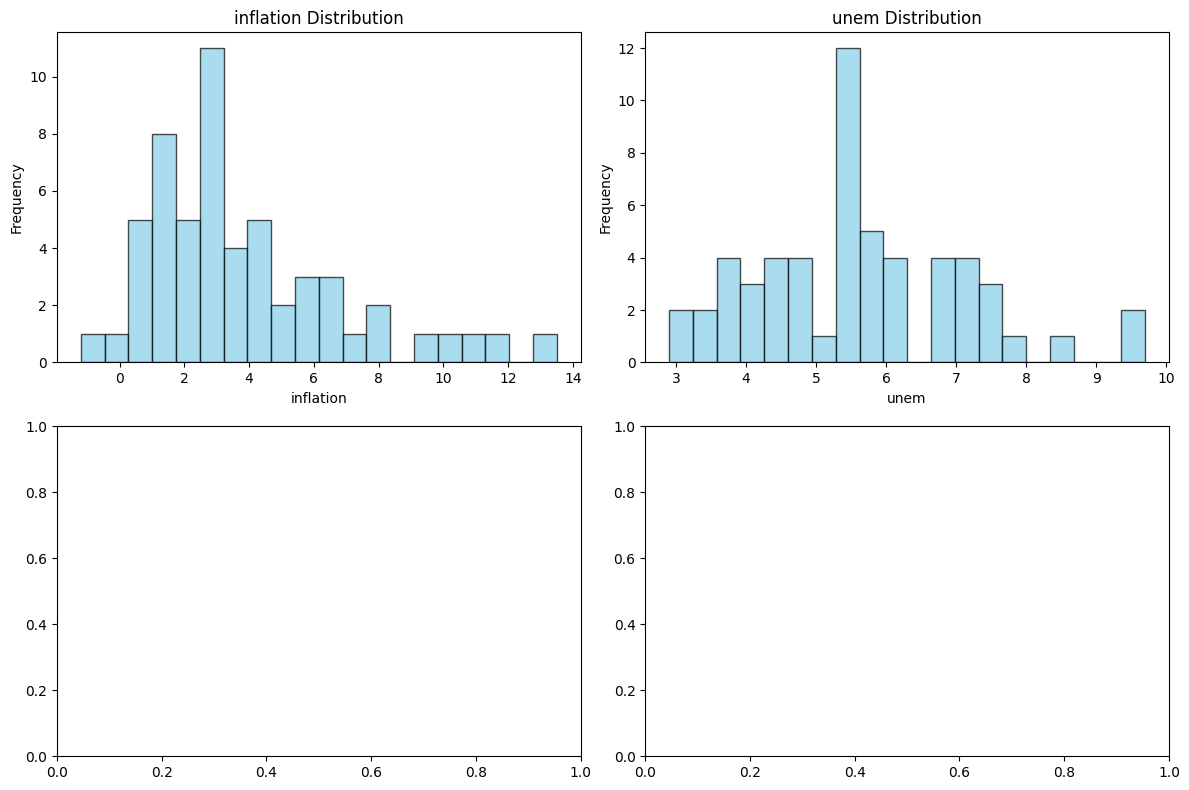

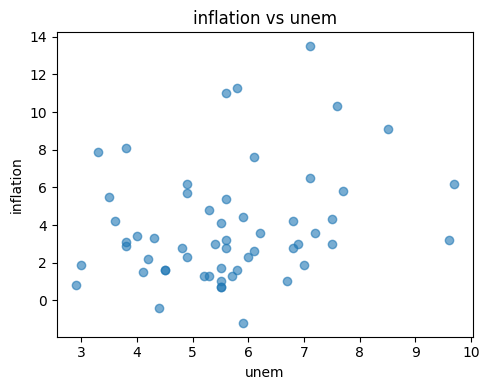


5. OLS 회귀분석 결과
--------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.579
Date:                Tue, 30 Sep 2025   Prob (F-statistic):             0.0639
Time:                        04:12:09   Log-Likelihood:                -139.43
No. Observations:                  56   AIC:                             282.9
Df Residuals:                      54   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0536      1.548      0.681      0.499      -2.050       4.157
unem           0.5024      0.266      1.892      0.064      -0.030       1.035
==============================================================================
Omnibus:                       13.468   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.302
Skew:                           1.138   Prob(JB):                     0.000784
Kurtosis:                       3.976   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


6. 잔차의 정규성 검정
--------------------------------------------------
Shapiro-Wilk Test:
  Statistic: 0.9057
  p-value: 0.0003
  Result: Reject Normality

Jarque-Bera Test:
  Statistic: 14.3017
  p-value: 0.0008
  Result: Reject Normality


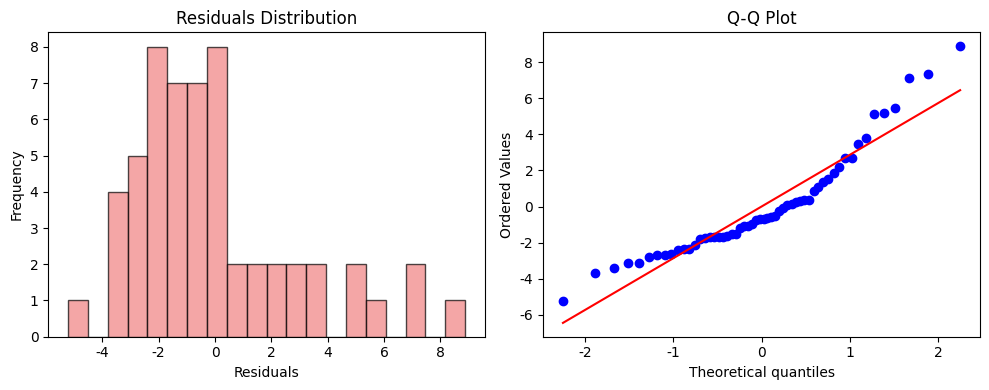


7. 모형설정 오류 검정 (RESET Test)
--------------------------------------------------
RESET Test (up to 3rd order):
  F-statistic: 1.1248
  p-value: 0.3325
  Result: Model is Well Specified

8. 다중공선성 검정 (VIF)
--------------------------------------------------
Single independent variable - multicollinearity test skipped.

9. 자기상관 검정 및 대안 추정법
--------------------------------------------------
Durbin-Watson Test:
  DW statistic: 0.8015
  Result: Positive autocorrelation suspected

Breusch-Godfrey Test (3 lags):
  F-statistic: 14.7869
  p-value: 0.0000
  Result: Autocorrelation Present

ARCH Test (3 lags):
  F-statistic: 7.2839
  p-value: 0.0004
  Result: ARCH Effects Present

Augmented Dickey-Fuller Test (종속변수):
  ADF statistic: -1.7459
  p-value: 0.4077
  Result: Non-stationary (Unit Root)

시계열 문제 탐지 결과:
  자기상관: True
  ARCH 효과: True
  비정상성: True

대안 추정법을 실행합니다...
  - HAC 표준오차 (Newey-West) 추정 중...
  ? HAC 표준오차 완료
  - Cochrane-Orcutt 추정 중...
  ? Cochrane-Orcutt 추정 완료
  - Prais-Winsten 추정 중...
  ?

{'ols_results': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7a4aee651af0>,
 'formula': 'inflation ~ unem',
 'data':     inflation  unem
 0         8.1   3.8
 1        -1.2   5.9
 2         1.3   5.3
 3         7.9   3.3
 4         1.9   3.0
 5         0.8   2.9
 6         0.7   5.5
 7        -0.4   4.4
 8         1.5   4.1
 9         3.3   4.3
 10        2.8   6.8
 11        0.7   5.5
 12        1.7   5.5
 13        1.0   6.7
 14        1.0   5.5
 15        1.3   5.7
 16        1.3   5.2
 17        1.6   4.5
 18        2.9   3.8
 19        3.1   3.8
 20        4.2   3.6
 21        5.5   3.5
 22        5.7   4.9
 23        4.4   5.9
 24        3.2   5.6
 25        6.2   4.9
 26       11.0   5.6
 27        9.1   8.5
 28        5.8   7.7
 29        6.5   7.1
 30        7.6   6.1
 31       11.3   5.8
 32       13.5   7.1
 33       10.3   7.6
 34        6.2   9.7
 35        3.2   9.6
 36        4.3   7.5
 37        3.6   7.2
 38        1.9   7.0
 39        3.6   6.2
 

In [ ]:
from Run_Comprehensive_OLS_analysis import Run_Comprehensive_OLS_analysis

# 데이터 로드 및 변수명 변경
phillips_data = woo.dataWoo('phillips')
phillips_data['inflation'] = phillips_data['inf']
display(phillips_data)

Run_Comprehensive_OLS_analysis(phillips_data, 'inflation', ['unem'], data_type='time_series')

In [ ]:
!python Functions/Run_Comprehensive_OLS_analysis.py

이 함수는 전통적 계량경제학 종합 분석 함수입니다. 


In [ ]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
#  MyProject 디렉터리 내에 다음 코드를 colab_setup.py파일로 저장후 다음 코드실행
# import colab_setup
# colab_setup.setup_project()

In [ ]:
import os
import sys
from pathlib import Path
def setup_project():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)  # 드라이브 마운트
    project_root = Path('/content/drive/MyDrive/MyProject')
    os.chdir(project_root)                             # 워킹 디렉터리 이동
    sys.path.append(str(project_root / 'Functions'))   # Functions 폴더를 import 경로에 추가
    print("Working Directory:", Path.cwd())
    print("Functions Path Added:", project_root / 'Functions')
    return project_root

In [ ]:
import colab_setup
colab_setup.setup_project()